In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as signal
import soundfile as sf
from matplotlib import rc

# Inverse Blues colormap
cdict = {
    'red':   ((0.0,  1.0, 1.0), (1.0,  0.0, 0.0)),
    'green': ((0.0,  1.0, 1.0), (1.0,  .15, .15)),
    'blue':  ((0.0,  1.0, 1.0), (1.0,  0.4, 0.4)),
    'alpha': ((0.0,  0.0, 0.0), (1.0,  1.0, 1.0))}
plt.register_cmap(name='InvBlueA', data=cdict)

# Customize my figure style
rc('figure', figsize=(8,4), dpi=96, facecolor='#FFFFFF00', autolayout=False)
rc('lines', linewidth=1)
rc('axes', axisbelow=True, titlesize=10, titleweight=500, 
   labelsize=9, labelweight=400, linewidth=0.5, facecolor='#FFFFFF00')
rc('xtick', labelsize=8)
rc('ytick', labelsize=8)
rc('axes.spines', right=False, top=False)
rc('grid', linestyle='-', linewidth=0.5)

# Get a decent figure font
matplotlib.font_manager._rebuild()
rc('font', family='Lucida Grande', weight=400, size=12)

# Light colors
rc('axes', edgecolor='#404040')
rc('grid', color='#DDDDDD')
rc('xtick', color='#222222')
rc('ytick', color='#222222')
rc('text', color='#222222', usetex=True)
rc('image', cmap='InvBlueA')
rc('legend', facecolor='#FFFFFF55', framealpha=0.5)

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/ryleyhiga/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Lucida Grande'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


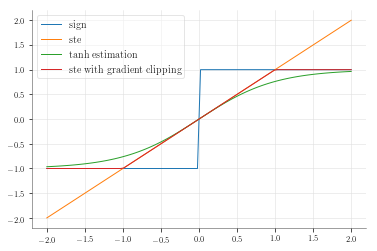

In [13]:
t = np.linspace(-2, 2, 100)
label1, = plt.plot(t, np.sign(t), label='sign')
label2, = plt.plot(t, t, label='ste')
label3, = plt.plot(t, np.tanh(t), label='tanh estimation')
label4, = plt.plot(t, np.minimum(np.maximum(t, -1), 1), label='ste with gradient clipping')
plt.legend()
plt.grid(True)
plt.savefig('activation_functions.png')

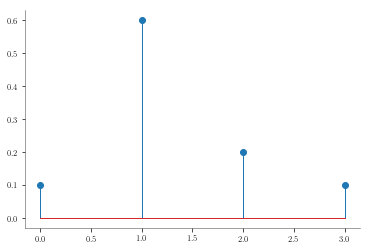

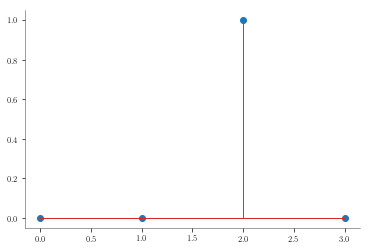

In [11]:
plt.figure()
plt.stem([0.1, 0.6, 0.2, 0.1])
plt.savefig('estimate_dist.png')
plt.figure()
plt.stem([0, 0, 1, 0])
plt.savefig('true_dist.png')

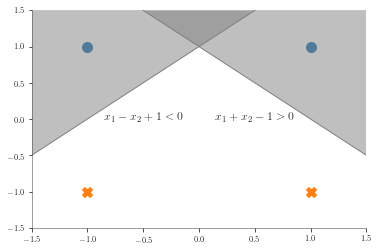

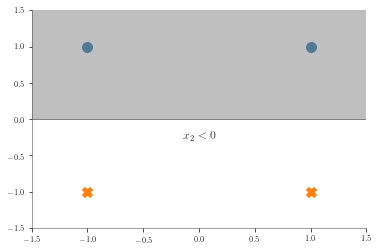

In [5]:
fig, ax = plt.subplots()
ax.scatter([-1, 1], [1, 1], marker='o', s=100)
ax.scatter([-1, 1], [-1, -1], marker='X', s=100)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

x = np.linspace(-1.5, 1.5, 100)
y1 = x + 1
y2 = -x + 1
ax.plot(x, y1, c='gray')
ax.plot(x, y2, c='gray')
ax.fill_between(x, y1, 1.5, facecolor='gray', alpha=0.5)
ax.fill_between(x, y2, 1.5, facecolor='gray', alpha=0.5)
ax.text(-0.5, 0, '$x_1 - x_2 + 1 < 0$', 
        fontsize=12,
        horizontalalignment='center',
        verticalalignment='center')
ax.text(0.5, 0, '$x_1 + x_2 - 1 > 0$', 
        fontsize=12,
        horizontalalignment='center',
        verticalalignment='center')
fig.savefig('hyp1.png')

fig, ax = plt.subplots()
ax.scatter([-1, 1], [1, 1], marker='o', s=100)
ax.scatter([-1, 1], [-1, -1], marker='X', s=100)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

x = np.linspace(-1.5, 1.5, 100)
y = np.zeros_like(x)
ax.plot(x, y, c='gray')
ax.fill_between(x, y, 1.5, facecolor='gray', alpha=0.5)
ax.text(0, -0.25, '$x_2 < 0$',
        fontsize=12,
        horizontalalignment='center',
        verticalalignment='center')
fig.savefig('hyp2.png')

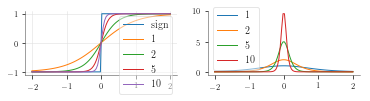

In [19]:
t = np.linspace(-2, 2, 100)
plt.figure()
plt.plot()
plt.subplot(321)
plt.plot(t, np.sign(t), label='sign')
for beta in [1, 2, 5, 10]:
    plt.plot(t, np.tanh(beta * t), label='{}'.format(beta))
plt.legend()
plt.grid(True)

plt.subplot(322)
for beta in [1, 2, 5, 10]:
    plt.plot(t, beta * (1 - np.tanh(beta * t)**2), label='{}'.format(beta))
plt.legend()

plt.subplot(323)
for beta in [1, 2, 5, 10]:
    plt.plot(t, beta * (1 - np.tanh(beta * t)**2), label='{}'.format(beta))
plt.legend()